In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [2]:
df=pd.read_csv(r"C:\Users\Usman\Downloads\page2\hiring.csv")

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
!pip install word2number

In [5]:
df.experience=df.experience.fillna("zero")

In [6]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [8]:
from word2number import w2n

In [9]:
df.experience = df.experience.apply(w2n.word_to_num)

In [10]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [11]:
import math
a=math.floor(df["test_score(out of 10)"].mean())
a

7

In [12]:
df["test_score(out of 10)"]=df["test_score(out of 10)"].fillna(a)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [51]:
reg=linear_model.LinearRegression()

In [14]:
reg.fit(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df["salary($)"])

LinearRegression()

In [19]:
reg.predict([["2","9","6"]])

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([53713.86677124])

In [16]:
reg.predict([["12","10","10"]])

C:\Users\Usman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([93747.79628651])

In [17]:
reg.score(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],df["salary($)"])

0.9770139014273139

Text(0, 0.5, 'salary($)')

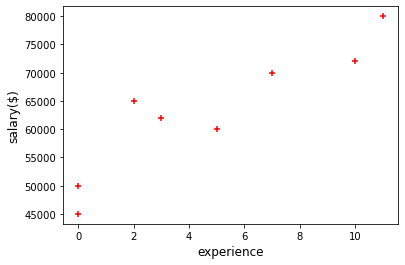

In [50]:
%matplotlib inline
plt.scatter(df["experience"],df["salary($)"],color="red",marker="+")
plt.xlabel("experience",fontsize=12)
plt.ylabel("salary($)",fontsize=12)
#plt.plot(df[["experience"]],reg.predict(df[["experience","test_score(out of 10)","interview_score(out of 10)"]]),color="red")
#plt.plot(df[["experience","test_score(out of 10)","interview_score(out of 10)"]],reg.predict(df[["experience","test_score(out of 10)","interview_score(out of 10)"]]),color="red")